RDKit ERROR: [15:47:07] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:47:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:47:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:47:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:47:08] Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [15:47:08] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
RDKit ERROR: [15:47:08] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C

Similar drugs found: 25
Chemical similarity threshold = 0.55


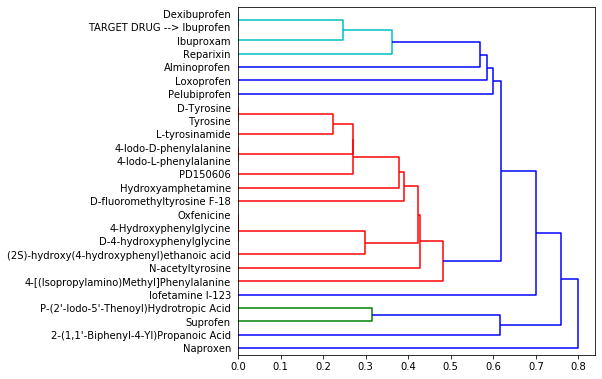

Ibuprofen (Advil, Motrin, NeoProfen, Caldolor): nonsteroidal anti-inflammatory drug, one of the
most common over-the-counter drugs. Most similar to other anti-inflammatory drugs, e.g.,
Ibuproxam, Alminoprofen, and Loxoprofen, as well as some experimental drugs, e.g., Reparixin and
Pelubiprofen, indicating potential usages. High similarity to several amino acids and derivatives
(red), e.g., tyrosine, phenylalanine, glycine, which might be useful for pain relief with or
without slight modification. Also similar to Hydroxyamphetamine, used to dilate the pupil during
eye examinations, suggesting a possible repurposing of Hydroxyamphetamine for pain management.


In [7]:
# Select data and plot dendrogram for target drug


import pandas as pd
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from scipy.spatial.distance import squareform as sf
import scipy.cluster.hierarchy as hier
import matplotlib.pyplot as plt

target_drug = 'Ibuprofen'
similarity_threshold = 0.55
morgan_radius = 2
filepath = '/Users/OfficeDeskTop/DI Capstone/'

drugs = pd.read_csv(filepath + 'structure links.csv', quotechar = '"')
size = len(drugs)

# Find target_drug

i = 0
while drugs.at[i, 'Name'] != target_drug:
    if i == size - 1:
        sys.exit('Reading ERROR: "' + target_drug + '" not found in dataset.')
    else:
        i += 1

smiles_target = drugs.at[i, 'SMILES']

if smiles_target is np.nan:
    sys.exit('Completeness ERROR: ' + target_drug + ' SMILES unavailable.')
    
names_array = np.array(drugs.at[i, 'Name'])
smiles_array = np.array([smiles_target])
dice_array = []

# Find drugs similar to target_drug

ms_target = Chem.MolFromSmiles(smiles_target)
fps_target = AllChem.GetMorganFingerprint(ms_target, morgan_radius)

for i in range(size):
    if drugs.at[i, 'Name'] != target_drug:        
        smiles_i = drugs.at[i, 'SMILES']
        
        if smiles_i is not np.nan:
            ms_i = Chem.MolFromSmiles(smiles_i)
            
            if ms_i is not None:
                fps_i = AllChem.GetMorganFingerprint(ms_i, morgan_radius)
                T_target_i = DataStructs.DiceSimilarity(fps_target, fps_i)
            
                if T_target_i > similarity_threshold:
                    names_array = np.append(names_array, drugs.at[i, 'Name'])
                    smiles_array = np.append(smiles_array, smiles_i)
                    dice_array = np.append(dice_array, T_target_i)
                
print('Similar drugs found: ' + str(len(names_array) - 1))
print('Chemical similarity threshold = ' + str(similarity_threshold))

# Compute redundant distance matrix

size1 = len(smiles_array)                
rdist_matrix = np.zeros((size1, size1))

for i in range(size1):
    ms_i = Chem.MolFromSmiles(smiles_array[i])
    fps_i = AllChem.GetMorganFingerprint(ms_i, morgan_radius)
    
    for j in range(i + 1, size1):
        ms_j = Chem.MolFromSmiles(smiles_array[j])
        fps_j = AllChem.GetMorganFingerprint(ms_j, morgan_radius)
        T_ij = DataStructs.DiceSimilarity(fps_i, fps_j)
        rdist_matrix[i, j] = -np.log(T_ij)/np.log(2)
        rdist_matrix[j, i] = -np.log(T_ij)/np.log(2)

# Convert to condensed distance matrix

cdist_matrix = sf(rdist_matrix)

# Compute linkage matrix

link_matrix = hier.linkage(cdist_matrix)

# Compute and plot dendrogram

names_array[0] = 'TARGET DRUG --> ' + target_drug

if len(names_array) <= 30:
    plt.figure(figsize = [6.4, 6.4])
else:
    plt.figure(figsize = [6.4, 8.5])

dendrogram = hier.dendrogram(link_matrix, orientation = 'right', labels =
                             names_array, leaf_rotation = 0)
plt.show()
print('Ibuprofen (Advil, Motrin, NeoProfen, Caldolor): nonsteroidal anti-inflammatory drug, one of the')
print('most common over-the-counter drugs. Most similar to other anti-inflammatory drugs, e.g.,')
print('Ibuproxam, Alminoprofen, and Loxoprofen, as well as some experimental drugs, e.g., Reparixin and')
print('Pelubiprofen, indicating potential usages. High similarity to several amino acids and derivatives')
print('(red), e.g., tyrosine, phenylalanine, glycine, which might be useful for pain relief with or')
print('without slight modification. Also similar to Hydroxyamphetamine, used to dilate the pupil during')
print('eye examinations, suggesting a possible repurposing of Hydroxyamphetamine for pain management.')
